# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [18]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [19]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [20]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [21]:
x_vals.shape

(200,)

In [22]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


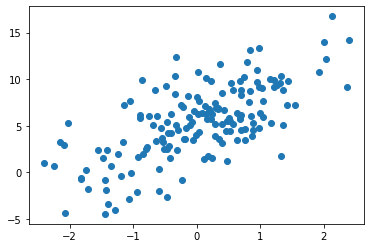

In [23]:
plt.scatter(x_train, y_train)

In [24]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [25]:
inputDim = 1
hidden_sizes = 100
outputDim = 1      
learningRate = 0.01 
epochs = 256



In [26]:
criterion = torch.nn.MSELoss() 

In [27]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, momentum=0.95)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 47.66180419921875
h: 2 | epoch: 50, loss: 11.378461837768555
h: 2 | epoch: 100, loss: 8.548173904418945
h: 2 | epoch: 150, loss: 8.432392120361328
h: 2 | epoch: 200, loss: 8.42043685913086
h: 2 | epoch: 250, loss: 8.419663429260254
h: 3 | epoch: 0, loss: 44.12261962890625
h: 3 | epoch: 50, loss: 9.69015884399414
h: 3 | epoch: 100, loss: 8.604056358337402
h: 3 | epoch: 150, loss: 8.485527038574219
h: 3 | epoch: 200, loss: 8.407892227172852
h: 3 | epoch: 250, loss: 8.391753196716309
h: 4 | epoch: 0, loss: 44.12217330932617
h: 4 | epoch: 50, loss: 9.280767440795898
h: 4 | epoch: 100, loss: 8.550420761108398
h: 4 | epoch: 150, loss: 8.404735565185547
h: 4 | epoch: 200, loss: 8.40101432800293
h: 4 | epoch: 250, loss: 8.398599624633789
h: 5 | epoch: 0, loss: 45.912841796875
h: 5 | epoch: 50, loss: 8.933496475219727
h: 5 | epoch: 100, loss: 8.39103889465332
h: 5 | epoch: 150, loss: 8.235337257385254
h: 5 | epoch: 200, loss: 8.119016647338867
h: 5 | epoch: 250, loss: 8.0

h: 34 | epoch: 100, loss: 8.109594345092773
h: 34 | epoch: 150, loss: 7.998808860778809
h: 34 | epoch: 200, loss: 7.9584150314331055
h: 34 | epoch: 250, loss: 7.933469295501709
h: 35 | epoch: 0, loss: 45.15049743652344
h: 35 | epoch: 50, loss: 8.528863906860352
h: 35 | epoch: 100, loss: 8.289788246154785
h: 35 | epoch: 150, loss: 8.147497177124023
h: 35 | epoch: 200, loss: 8.037965774536133
h: 35 | epoch: 250, loss: 7.997183322906494
h: 36 | epoch: 0, loss: 44.470279693603516
h: 36 | epoch: 50, loss: 8.706695556640625
h: 36 | epoch: 100, loss: 8.220979690551758
h: 36 | epoch: 150, loss: 8.045869827270508
h: 36 | epoch: 200, loss: 7.982684135437012
h: 36 | epoch: 250, loss: 7.959206581115723
h: 37 | epoch: 0, loss: 42.323875427246094
h: 37 | epoch: 50, loss: 8.68467903137207
h: 37 | epoch: 100, loss: 8.39228630065918
h: 37 | epoch: 150, loss: 8.244421005249023
h: 37 | epoch: 200, loss: 8.141865730285645
h: 37 | epoch: 250, loss: 8.054086685180664
h: 38 | epoch: 0, loss: 53.8320693969726

h: 66 | epoch: 50, loss: 8.782255172729492
h: 66 | epoch: 100, loss: 8.331530570983887
h: 66 | epoch: 150, loss: 8.231359481811523
h: 66 | epoch: 200, loss: 8.118901252746582
h: 66 | epoch: 250, loss: 8.028902053833008
h: 67 | epoch: 0, loss: 40.493133544921875
h: 67 | epoch: 50, loss: 9.056045532226562
h: 67 | epoch: 100, loss: 8.292754173278809
h: 67 | epoch: 150, loss: 8.099031448364258
h: 67 | epoch: 200, loss: 8.007194519042969
h: 67 | epoch: 250, loss: 7.967759132385254
h: 68 | epoch: 0, loss: 41.1320915222168
h: 68 | epoch: 50, loss: 8.51587200164795
h: 68 | epoch: 100, loss: 8.342823028564453
h: 68 | epoch: 150, loss: 8.164408683776855
h: 68 | epoch: 200, loss: 8.058156967163086
h: 68 | epoch: 250, loss: 8.004859924316406
h: 69 | epoch: 0, loss: 43.377479553222656
h: 69 | epoch: 50, loss: 8.691476821899414
h: 69 | epoch: 100, loss: 8.308359146118164
h: 69 | epoch: 150, loss: 8.191006660461426
h: 69 | epoch: 200, loss: 8.109029769897461
h: 69 | epoch: 250, loss: 8.04096508026123

h: 98 | epoch: 100, loss: 8.271097183227539
h: 98 | epoch: 150, loss: 8.068806648254395
h: 98 | epoch: 200, loss: 7.993971347808838
h: 98 | epoch: 250, loss: 7.967886447906494
h: 99 | epoch: 0, loss: 43.11228942871094
h: 99 | epoch: 50, loss: 8.81823444366455
h: 99 | epoch: 100, loss: 8.036786079406738
h: 99 | epoch: 150, loss: 7.953061103820801
h: 99 | epoch: 200, loss: 7.918898582458496
h: 99 | epoch: 250, loss: 7.899668216705322


In [28]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.2937565 ]
 [ 3.4630303 ]
 [ 4.587537  ]
 [ 6.0176044 ]
 [ 7.5623217 ]
 [-0.10267448]
 [ 8.417377  ]
 [ 5.5889626 ]
 [ 6.141832  ]
 [ 6.3585386 ]
 [ 3.8278067 ]
 [ 3.6110194 ]
 [ 7.1862783 ]
 [ 4.4360657 ]
 [ 5.421028  ]
 [ 3.3940296 ]
 [ 7.5641785 ]
 [ 8.728106  ]
 [ 6.6083    ]
 [ 4.570736  ]
 [-0.26919675]
 [ 0.16725278]
 [ 5.943099  ]
 [ 3.9235425 ]
 [-0.35565686]
 [ 4.59284   ]
 [ 5.392926  ]
 [ 7.719036  ]
 [ 5.714826  ]
 [ 6.6377773 ]
 [-0.46879125]
 [ 6.097215  ]
 [ 5.9413047 ]
 [ 8.172393  ]
 [ 2.9613137 ]
 [ 3.1980264 ]
 [ 0.6857898 ]
 [ 8.051179  ]
 [ 7.0639334 ]
 [ 6.2684216 ]
 [ 6.80414   ]
 [ 6.335473  ]
 [ 6.00972   ]
 [ 6.1912813 ]
 [ 6.735305  ]
 [ 7.2450495 ]
 [ 1.00723   ]
 [ 6.935157  ]
 [ 7.6882324 ]
 [ 4.665781  ]
 [ 6.018323  ]
 [ 3.2321405 ]
 [ 0.8221929 ]
 [ 6.149637  ]
 [11.79727   ]
 [ 3.028107  ]
 [ 6.11882   ]
 [ 5.343742  ]
 [ 8.524922  ]
 [ 6.808632  ]
 [ 0.17099047]
 [ 5.9100885 ]
 [ 7.184503  ]
 [ 5.161546  ]
 [ 6.140998  ]
 [ 5.512692  ]
 [ 5.85481

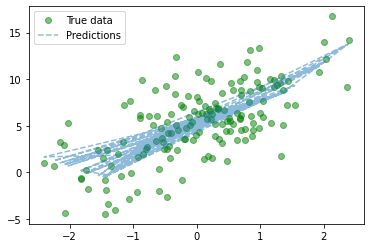

In [29]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Interpolation threshold.
Plot the interpolation threshold (n=p) as a vertical line.
The number of parameters is $p = (d+1)*H + (H+1)*K$, where H is a number of neurons in a hidden layer;
d is a dimension of input and K is a dimension of output (K=1 in the case of regression).
The X-axis on the plot below reveals the size of H.
1. What will be the value of H for the case n=p?
2. Plot the interpolation threshold. Does it correspond to a test loss pick?

(0.0, 100.0)

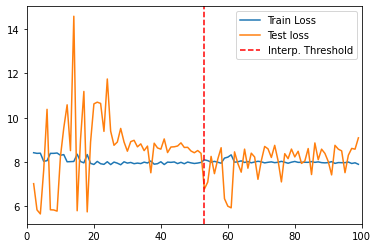

In [30]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.axvline(53, color = 'r', linestyle = '--', label = 'Interp. Threshold')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

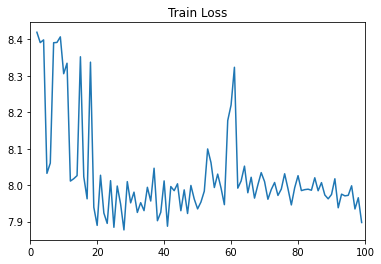

In [31]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

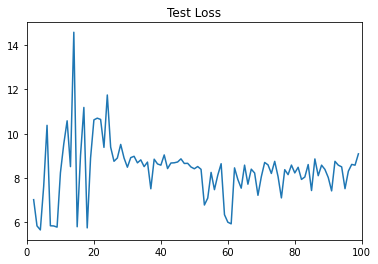

In [32]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)